In [71]:
import numpy as np
import pandas as pd
import glob
import matplotlib
from matplotlib import pyplot as plt

In [72]:
mvFiles = glob.glob('data/KC_KOBIS_BOX_OFFIC_MOVIE_INFO_*.csv')
mvFiles

['data\\KC_KOBIS_BOX_OFFIC_MOVIE_INFO_202106.csv',
 'data\\KC_KOBIS_BOX_OFFIC_MOVIE_INFO_202107.csv',
 'data\\KC_KOBIS_BOX_OFFIC_MOVIE_INFO_202108.csv',
 'data\\KC_KOBIS_BOX_OFFIC_MOVIE_INFO_202109.csv',
 'data\\KC_KOBIS_BOX_OFFIC_MOVIE_INFO_202110.csv',
 'data\\KC_KOBIS_BOX_OFFIC_MOVIE_INFO_202111.csv',
 'data\\KC_KOBIS_BOX_OFFIC_MOVIE_INFO_202112.csv',
 'data\\KC_KOBIS_BOX_OFFIC_MOVIE_INFO_202201.csv',
 'data\\KC_KOBIS_BOX_OFFIC_MOVIE_INFO_202202.csv',
 'data\\KC_KOBIS_BOX_OFFIC_MOVIE_INFO_202203.csv']

In [73]:
mvs = []
for mvFile in mvFiles:
    mv = pd.read_csv(mvFile, encoding='utf-8', index_col=0)
    mvs.append(mv)

mvs = pd.concat([mv for mv in mvs])
mvs['OPEN_DE'] = mvs['OPEN_DE'].astype(str)
mvs['GENRE_NM'] = mvs['GENRE_NM'].astype(str)

print(mvs.shape)

mvs = mvs.drop_duplicates(['MOVIE_NM', 'MNG_NM', 'MAKR_NM'])

print(mvs.shape)

# 개봉날짜 없는 데이터 제거
spac = mvs[mvs['OPEN_DE'].str.contains('nan')].index
mvs.drop(spac, inplace=True)
# 장르 없는 데이터 제거
spac = mvs[mvs['GENRE_NM'].str.contains('nan')].index
mvs.drop(spac, inplace=True)

mvs.reset_index(inplace=True)

print(mvs.shape)

mvs

(2395, 17)
(1531, 17)
(1519, 18)


,SN,MOVIE_NM,MNG_NM,MAKR_NM,IMPORT_CMPNY_NM,DISTB_CMPNY_NM,OPEN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,WNTY_SCREEN_CO,WNTY_SELNG_AM,WNTY_AUDE_CO,SU_SELNG_AM,SU_AUDE_CO,GENRE_NM,GRAD_NM,MOVIE_SE
0,1,크루엘라,크레이그 질레스피,NaN,월트디즈니컴퍼니코리아 유한책임회사,월트디즈니컴퍼니코리아 유한책임회사,20210526.0,개봉영화,장편,미국,NaN,NaN,NaN,NaN,NaN,드라마,12세이상관람가,일반영화
1,2,컨저링3: 악마가 시켰다,마이클 차베즈,NaN,워너브러더스 코리아(주),워너브러더스 코리아(주),20210603.0,개봉영화,장편,미국,NaN,NaN,NaN,NaN,NaN,공포(호러),15세이상관람가,일반영화
2,3,콰이어트 플레이스 2,존 크래신스키,NaN,롯데컬처웍스(주)롯데엔터테인먼트,롯데컬처웍스(주)롯데엔터테인먼트,20210616.0,개봉영화,장편,미국,NaN,NaN,NaN,NaN,NaN,스릴러,15세이상관람가,일반영화
3,4,분노의 질주: 더 얼티메이트,저스틴 린,NaN,유니버설픽쳐스인터내셔널 코리아(유),유니버설픽쳐스인터내셔널 코리아(유),20210519.0,개봉영화,장편,미국,NaN,NaN,NaN,NaN,NaN,액션,12세이상관람가,일반영화
4,5,발신제한,김창주,"(주)티피에스컴퍼니,(주)씨제이이엔엠",NaN,(주)씨제이이엔엠,20210623.0,개봉영화,장편,한국,NaN,NaN,NaN,NaN,NaN,스릴러,15세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1514,234,헤픈 누나:쿨하게 해볼까,카오루,NaN,NaN,(주)영진크리에이티브,2022-03-,개봉영화,장편,일본,1.0,NaN,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화
1515,235,형수는 나의 것,사쿠라비토,NaN,NaN,(주)영진크리에이티브,2022-03-,개봉영화,장편,일본,1.0,NaN,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화
1516,236,화냥녀,윤신,(주)픽쳐레스크,NaN,(주)픽쳐레스크,2022-03-,개봉영화,장편,한국,1.0,NaN,1.0,0.0,0.0,멜로/로맨스,청소년관람불가,일반영화
1517,237,환생한 섹스 9단,전성기,주식회사 바나나픽쳐스,NaN,주식회사 바나나픽쳐스,2022-03-,개봉영화,장편,한국,1.0,NaN,1.0,0.0,0.0,드라마,청소년관람불가,일반영화


In [74]:


for i in range(len(mvs)):
    mvs.loc[i, 'OPEN_DE'] = mvs.loc[i, 'OPEN_DE'].replace('-','')[:6]

# 개볼날짜 2020년 10월인 데이터 제거
spac = mvs[mvs['OPEN_DE'].str.contains('202010')].index
mvs.drop(spac, inplace=True)
mvs.reset_index(inplace=True)

genre_nms = mvs['GENRE_NM'].unique().tolist() # 장르
open_de = mvs['OPEN_DE'].unique().tolist() # 개봉 날짜
open_de.sort()

print(genre_nms)
print(open_de)
genre_count = [[0 for col in range(len(genre_nms))] for row in range(len(open_de))]


['드라마', '공포(호러)', '스릴러', '액션', '애니메이션', '미스터리', '범죄', '뮤지컬', '다큐멘터리', 'SF', '기타', '코미디', '판타지', '공연', '어드벤처', '멜로/로맨스', '사극', '성인물(에로)', '전쟁', '가족']
['202101', '202102', '202103', '202104', '202105', '202106', '202107', '202108', '202109', '202110', '202111', '202112', '202201', '202202', '202203']


In [75]:
for i in range(len(mvs)):
    genre = mvs.loc[i, 'GENRE_NM']
    de = mvs.loc[i, 'OPEN_DE']

    genre_index = genre_nms.index(genre)
    de_index = open_de.index(de)

    genre_count[de_index][genre_index] += 1

print(genre_count)

[[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0], [4, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [7, 0, 1, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], [12, 0, 1, 2, 6, 1, 3, 1, 4, 1, 1, 3, 0, 2, 1, 0, 0, 0, 0, 0], [31, 4, 3, 10, 5, 1, 2, 2, 7, 1, 2, 4, 3, 0, 1, 50, 0, 25, 0, 0], [22, 11, 4, 9, 7, 2, 3, 0, 4, 2, 0, 5, 2, 1, 0, 60, 0, 22, 0, 0], [16, 6, 0, 9, 5, 1, 1, 0, 6, 1, 1, 4, 1, 2, 1, 50, 0, 15, 1, 0], [26, 6, 4, 10, 10, 5, 2, 0, 3, 0, 1, 7, 1, 3, 1, 46, 0, 21, 0, 0], [27, 7, 2, 10, 6, 0, 3, 0, 9, 1, 2, 3, 2, 1, 0, 54, 0, 13, 0, 0], [32, 2, 5, 10, 5, 1, 2, 2, 8, 1, 0, 3, 2, 1, 0, 76, 0, 16, 1, 1], [33, 5, 0, 10, 9, 1, 2, 1, 8, 2, 2, 3, 6, 1, 2, 48, 0, 17, 0, 0], [19, 2, 2, 18, 6, 0, 4, 1, 3, 0, 1, 4, 0, 6, 3, 57, 0, 26, 0, 0], [8, 2, 5, 11, 3, 2, 3, 0, 7, 0, 1, 2, 0, 3, 1, 45, 1, 18, 0, 1], [35, 2, 3, 10, 4, 1, 3, 0, 2, 0, 0, 1, 1, 2, 0, 72, 0, 22, 1, 1]]


In [76]:
result_df = pd.DataFrame(genre_count, index=open_de, columns=genre_nms)

result_df

,드라마,공포(호러),스릴러,액션,애니메이션,미스터리,범죄,뮤지컬,다큐멘터리,SF,기타,코미디,판타지,공연,어드벤처,멜로/로맨스,사극,성인물(에로),전쟁,가족
202101,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
202102,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
202103,4,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
202104,7,0,1,1,2,1,0,0,2,0,0,0,0,0,0,1,0,0,0,0
202105,12,0,1,2,6,1,3,1,4,1,1,3,0,2,1,0,0,0,0,0
202106,31,4,3,10,5,1,2,2,7,1,2,4,3,0,1,50,0,25,0,0
202107,22,11,4,9,7,2,3,0,4,2,0,5,2,1,0,60,0,22,0,0
202108,16,6,0,9,5,1,1,0,6,1,1,4,1,2,1,50,0,15,1,0
202109,26,6,4,10,10,5,2,0,3,0,1,7,1,3,1,46,0,21,0,0
202110,27,7,2,10,6,0,3,0,9,1,2,3,2,1,0,54,0,13,0,0


<AxesSubplot:title={'center':'날짜별 개봉 장르'}>

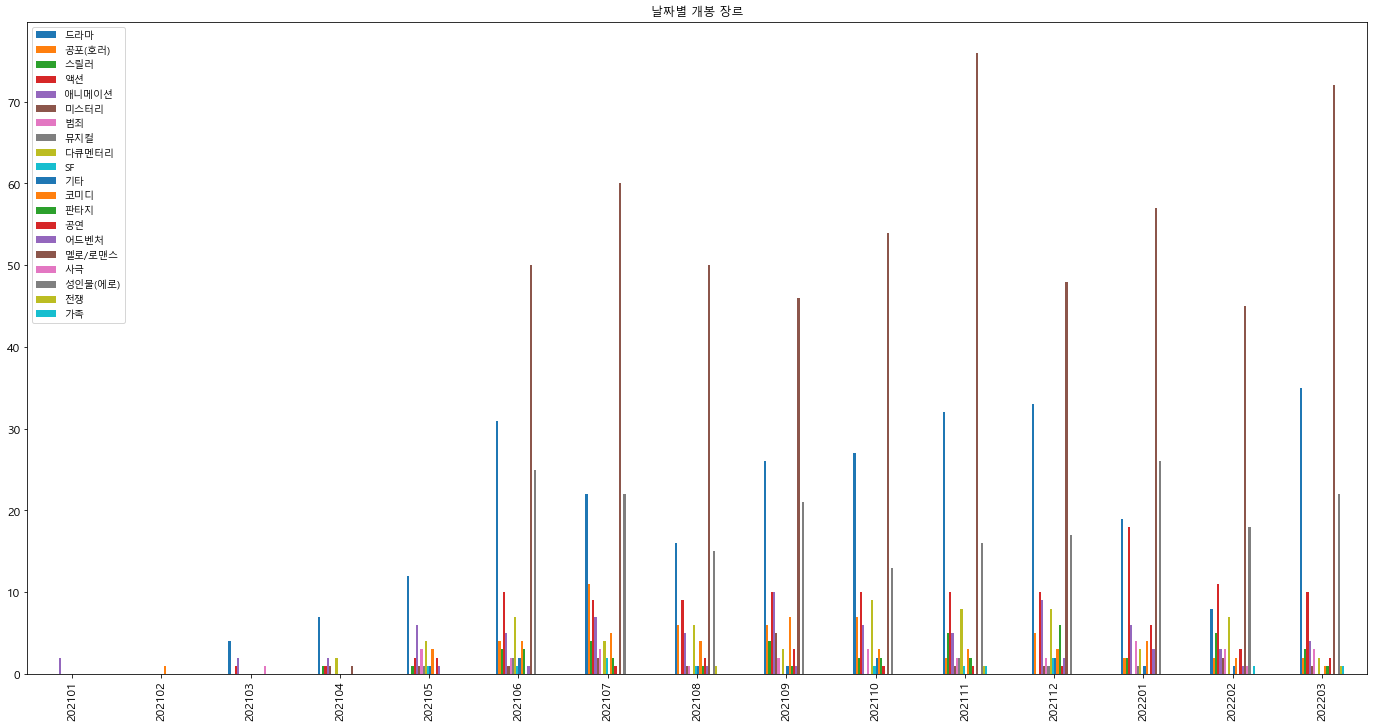

In [77]:
font_name = matplotlib.font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font', family=font_name)

result_df.plot(kind='bar', title='날짜별 개봉 장르', figsize=(24, 12), legend=True, fontsize=12)

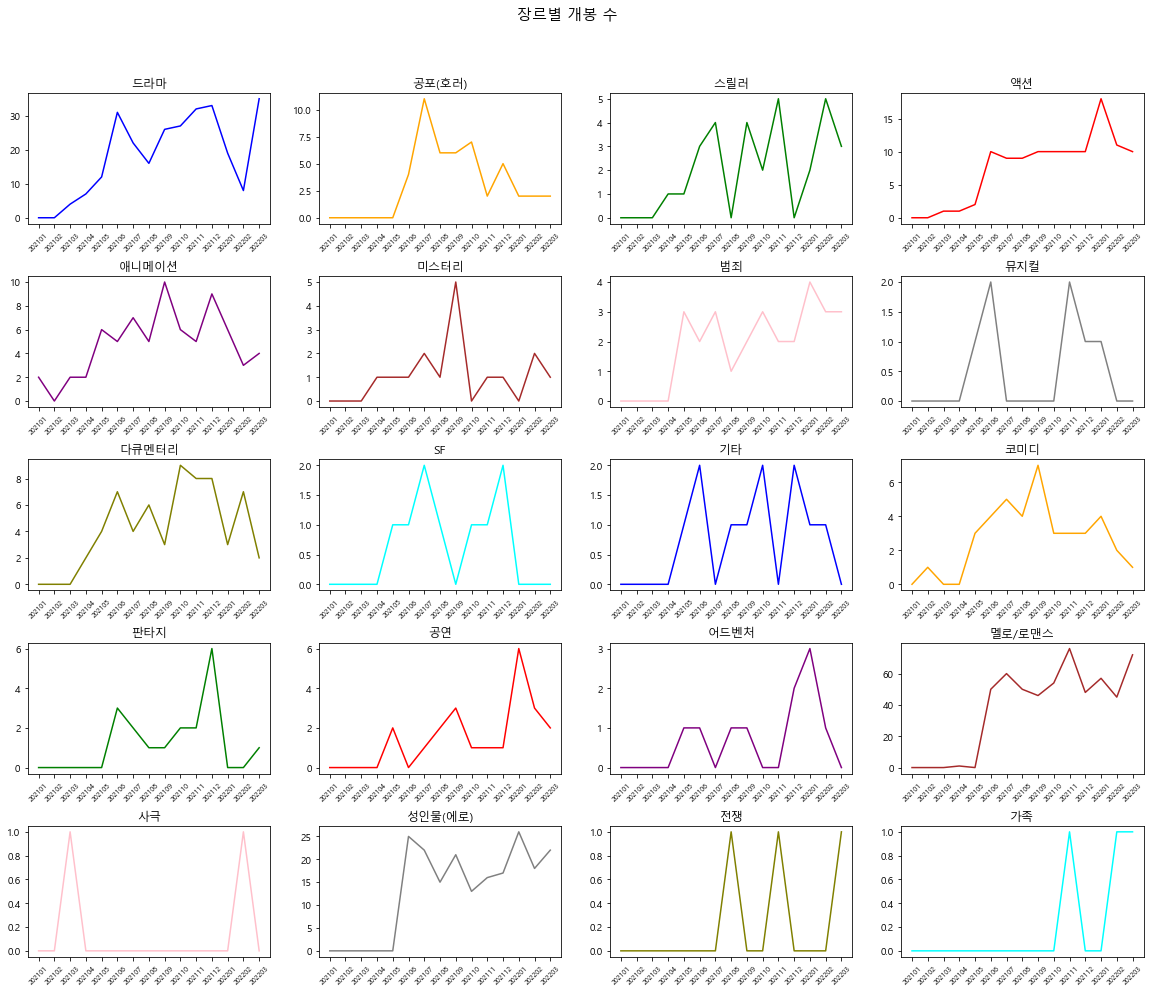

In [80]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

f, axes = plt.subplots(5, 4)
# 격자 크기 설정
f.set_size_inches((20, 15))
# 격자 여백 설정
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.4)

f.suptitle('장르별 개봉 수', fontsize = 15)

row = 0
col = 0
for i in range(len(genre_nms)):
    if i>0 and i%4==0:
        row += 1

    axes[row, i % 4].set_title(genre_nms[i], fontsize = 12)
    axes[row, i % 4].tick_params(axis='x', labelsize=7, rotation=45)
    axes[row, i % 4].plot(open_de, result_df[genre_nms[i]], color=colors[i % 10])

plt.show()